In [1]:
# Import modules for our task

import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, normalize

In [2]:
# Import system libraries and our Scripts

import os
import sys
import warnings
warnings.filterwarnings('ignore')
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from user_overview_script import UserOverviewScript
from df_cleaning import DataFrameCleaning
from df_info import DataFrameInfo
from df_outlier import *
from plots import *

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option("expand_frame_repr", False)
pd.set_option('display.float_format', '{:.2f}'.format)

In [4]:
# Read Engagment and Experience Telecom dataset

user_engagement  = pd.read_csv('../data/user_engagement.csv')
user_experience = pd.read_csv('../data/user_experiance.csv')

In [5]:
user_engagement.head()

,Customer_Id,Cluster,Session_Frequency,Duration,Total_Data_Volume
0,33601001722.00,3,1.00,116720.00,878690574.00
1,33601001754.00,2,1.00,181230.00,156859643.00
2,33601002511.00,2,1.00,134969.00,595966483.00
3,33601007832.00,0,1.00,49878.00,422320698.00
4,33601008617.00,1,2.00,37104.00,1457410944.00


In [6]:
user_experience.rename(columns = {'MSISDN_Number':'Customer_Id'}, inplace=True)
user_experience.head()

,Customer_Id,Cluster,Total_Avg_RTT,Total_Avg_Bearer_TP,Total_Avg_TCP
0,33601001722.00,0,0.05,76.00,3919.15
1,33601001754.00,1,0.03,99.00,1119.76
2,33601002511.00,1,0.05,97.00,1119.76
3,33601007832.00,1,0.08,248.00,366.24
4,33601008617.00,2,0.12,56844.00,1858.68


### **Task 4** - User Satisifaction Analysis
 Based on the Engagement Analysis and the Experience Analysis we have conducted in previous tasks, we will analyze the User Satisifaction in this task.
##### **Task 4.1.** - Write a python program to assign:
* An engagement score to each user, and
* An experience score to each user

##### Assign User Engagement Score

In [7]:
# Read the saved user engagement model

with open("../models/user_engagement.pkl", "rb") as f:
    kmeans1 = pickle.load(f)
less_engaged_score = 3

In [8]:
engagement_df = user_engagement.set_index('Customer_Id')[
    ['Duration', 'Total_Data_Volume', 'Session_Frequency']]
scaler = StandardScaler()
scaled_array = scaler.fit_transform(engagement_df)
pd.DataFrame(scaled_array).head(5)

,0,1,2
0,-0.07,0.54,-0.55
1,0.74,-1.28,-0.55
2,0.16,-0.17,-0.55
3,-0.92,-0.61,-0.55
4,-1.08,2.00,0.98


In [9]:
data_normalized = normalize(scaled_array)
pd.DataFrame(data_normalized).head(5)

,0,1,2
0,-0.09,0.70,-0.71
1,0.47,-0.81,-0.35
2,0.26,-0.29,-0.92
3,-0.74,-0.50,-0.45
4,-0.44,0.81,0.39


In [11]:
distance = kmeans1.fit_transform(data_normalized)
distance_from_less_engaged_score = list(
    map(lambda x: x[less_engaged_score], distance))
user_engagement['Engagement_Score'] = distance_from_less_engaged_score
user_engagement.head(5)

,Customer_Id,Cluster,Session_Frequency,Duration,Total_Data_Volume,Engagement_Score
0,33601001722.00,3,1.00,116720.00,878690574.00,0.76
1,33601001754.00,2,1.00,181230.00,156859643.00,1.53
2,33601002511.00,2,1.00,134969.00,595966483.00,1.09
3,33601007832.00,0,1.00,49878.00,422320698.00,0.72
4,33601008617.00,1,2.00,37104.00,1457410944.00,1.19


##### Assign User Experience Score

In [12]:
# Read the saved user engagement model

with open("../models/user_experiance.pkl", "rb") as f:
    kmeans2 = pickle.load(f)
worst_experience = 0

In [13]:
experience_df = user_experience.set_index('Customer_Id')[
    ['Total_Avg_RTT', 'Total_Avg_Bearer_TP', 'Total_Avg_TCP']]
scaler = StandardScaler()
scaled_array = scaler.fit_transform(experience_df)
pd.DataFrame(scaled_array).head(5)

,0,1,2
0,-0.69,-0.66,1.74
1,-0.93,-0.66,-0.48
2,-0.62,-0.66,-0.48
3,-0.08,-0.66,-1.08
4,0.47,1.78,0.11


In [14]:
data_normalized = normalize(scaled_array)
pd.DataFrame(data_normalized).head(5)

,0,1,2
0,-0.35,-0.33,0.88
1,-0.75,-0.54,-0.39
2,-0.61,-0.64,-0.47
3,-0.07,-0.52,-0.85
4,0.26,0.96,0.06


In [18]:
experience_df = user_experience.set_index('Customer_Id')
distance = kmeans2.fit_transform(data_normalized)
distance_from_worst_experience = list(
    map(lambda x: x[worst_experience], distance))
user_experience['Experience_Score'] = distance_from_worst_experience
user_experience.head(5)

,Customer_Id,Cluster,Total_Avg_RTT,Total_Avg_Bearer_TP,Total_Avg_TCP,Experience_Score
0,33601001722.00,0,0.05,76.00,3919.15,0.39
1,33601001754.00,1,0.03,99.00,1119.76,1.39
2,33601002511.00,1,0.05,97.00,1119.76,1.41
3,33601007832.00,1,0.08,248.00,366.24,1.62
4,33601008617.00,2,0.12,56844.00,1858.68,1.45


##### **Task 4.2** - Consider the average of both Engagement & Experience Scores as  the satisfaction score & report the top 10 satisfied customers

In [25]:
user_id_engagement = user_engagement['Customer_Id'].values
user_id_experiance = user_experience['Customer_Id'].values
user_intersection = list(set(user_id_engagement).intersection(user_id_experiance))
user_intersection[:5]

[33662697474.0, 33665581058.0, 33628094468.0, 33666105351.0, 33782497288.0]

In [26]:
user_engagement_df = user_engagement[user_engagement['Customer_Id'].isin(user_intersection)]
user_engagement_df.shape

(106471, 6)

In [28]:
user_experience_df = user_experience[user_experience['Customer_Id'].isin(
    user_intersection)]
user_experience_df.shape

(106471, 6)

In [30]:
user_df = pd.merge(user_engagement_df, user_experience_df, on='Customer_Id')
user_df['Satisfaction_Score'] = (
    user_df['Engagement_Score'] + user_df['Experience_Score'])/2
user_df.head(5)

,Customer_Id,Cluster_x,Session_Frequency,Duration,Total_Data_Volume,Engagement_Score,Cluster_y,Total_Avg_RTT,Total_Avg_Bearer_TP,Total_Avg_TCP,Experience_Score,Satisfaction_Score
0,33601001722.00,3,1.00,116720.00,878690574.00,0.76,0,0.05,76.00,3919.15,0.39,0.58
1,33601001754.00,2,1.00,181230.00,156859643.00,1.53,1,0.03,99.00,1119.76,1.39,1.46
2,33601002511.00,2,1.00,134969.00,595966483.00,1.09,1,0.05,97.00,1119.76,1.41,1.25
3,33601007832.00,0,1.00,49878.00,422320698.00,0.72,1,0.08,248.00,366.24,1.62,1.17
4,33601008617.00,1,2.00,37104.00,1457410944.00,1.19,2,0.12,56844.00,1858.68,1.45,1.32


In [31]:
sat_score_df = user_df[['Customer_Id', 'Engagement_Score',
                        'Experience_Score', 'Satisfaction_Score']]
sat_score_df = sat_score_df.set_index('Customer_Id')
sat_score_df.head(5)

,Engagement_Score,Experience_Score,Satisfaction_Score
Customer_Id,,,
33601001722.00,0.76,0.39,0.58
33601001754.00,1.53,1.39,1.46
33601002511.00,1.09,1.41,1.25
33601007832.00,0.72,1.62,1.17
33601008617.00,1.19,1.45,1.32


In [33]:
sorted_by_satisfaction = sat_score_df.sort_values('Satisfaction_Score', ascending=False)
sat_top_10 = sorted_by_satisfaction['Satisfaction_Score'].head(10)
sat_top_10

Customer_Id
33616742714.00   1.85
33669112162.00   1.85
33660327467.00   1.85
33669680684.00   1.85
33762960893.00   1.84
33662003001.00   1.84
33629561756.00   1.84
33666901229.00   1.84
33645902629.00   1.84
33664762163.00   1.84
Name: Satisfaction_Score, dtype: float64

<AxesSubplot:xlabel='Satisfaction_Score', ylabel='Density'>

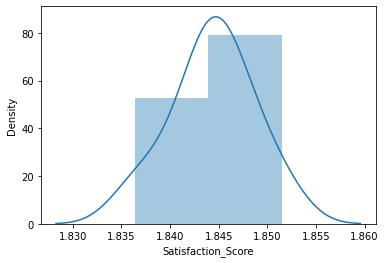

In [34]:
sns.distplot(sat_top_10)